<a href="https://colab.research.google.com/github/sepehrnoory/EECS-700/blob/main/demos/EmbeddedML_L05_T1_2_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_T1.2.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---

### In this Colab we will get to explore training our first neural network — see just how easy that can be with TensorFlow! We will train both a Single-layer Neural Network and a Multi-layer Neural Network, both learning the function Y = 2X - 1. We will observe the differences between both the models. Finally, we will see if the trained models will predict Y as 19 for X = 10?

# 1.Single-layer Neural Network

A single-layer neural network represents the most simple form of neural network, in which a single layer of nodes receive weighted input(s).

We import the following libraries -

1.   [tensorflow](https://www.tensorflow.org/) - open source library to develop and train ML models
2.   [numpy](https://numpy.org/) - scientific computing in Python
3.   [keras](https://keras.io/) - deep learning framework built on top of TensorFlow
4.   [matplotlib](https://matplotlib.org/) - visualization of data in Python

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

### Define Model

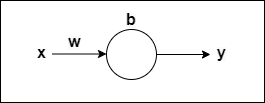


We define our model to have one dense layer with one neuron. A dense layer represents a densely-connected NN layer. The tensorflow API `keras.layers.Dense()` implements the operation:

> `output = activation(dotproduct(input, weight) + bias)  `

Read more about the Dense layer API [here.](https://keras.io/api/layers/core_layers/dense/)






In [ ]:
my_layer = keras.layers.Dense(units=1, input_shape=[1])

The neural networks that we define are feed-forward networks where the nodes' connections do not form a loop i.e., information passes only in one direction. The tensorflow API `tf.keras.Sequential()` groups a linear stack of layers into a tf.keras.Model. Read more about this API [here](https://keras.io/guides/sequential_model/).

Next, we define the optimizer (here, Stochastic Gradient Descent) and loss function (here, Mean Squared Error). The TensorFlow API `model.compile()` is used for this. Read more about this API [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model/).

In [ ]:
model = tf.keras.Sequential([my_layer])

OPT = # < YOUR CODE HERE >
LOSS = # < YOUR CODE HERE >
model.compile(optimizer=OPT, loss=LOSS)

***Hint:*** Use the 'sgd' optimizer and 'mean_squared_error' loss.

---


**Question 1**: The `model.compile()` API defines the training procedure based on the specified Optimization Algorithm and Loss Function. True/False?

**Answer:**

---

### Train Model

After we define our model, we train it on a given dataset. The tensorflow API `model.fit()` is used to train/fit the model on training data for a fixed number of epochs.

In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

### Let's look at our trained model's prediction for sample X values.

Once the model is trained, we can test it out on new data (test data i.e., new X values). We see that, for example, the model outputs Y = ~ 18.98 for X = 10.0. We will see later that a more complicated neural network could give an output closer to 19.0.

Here, the tensorflow API `model.predict()` is used.

In [ ]:
print(model.predict([10.0]))

---


**Question 2**: Report the predicted Y values for three different examples of X values. Do they satify the equation Y = 2X - 1 ?

**Answer:**
1.   X = , predicted_Y =
2.   X = , predicted_Y =
3.   X = , predicted_Y =


---

### Let's look at our model's learned weights.

After training, the tensorflow API `layer.get_weights()` returns the learned model parameters for the current layer. Here, the first value represents the weight and the second value represents the bias. Read more about this API [here](https://keras.io/api/layers/base_layer/).

In [ ]:
print(my_layer.get_weights())

# 2. Multi-layer Neural Network (DNN)
In this section we train a 2-layer network to learn the same function: Y = 2X - 1 and see what its prediction and weights are.



The notation used in the below diagram is as follows:


*   **x** - input, **w** - weight, **b** - bias, **a** - activation (neuron output), **y** - final output
*   superscript - (layer number)
*   subscript - (source unit number, destination unit number)




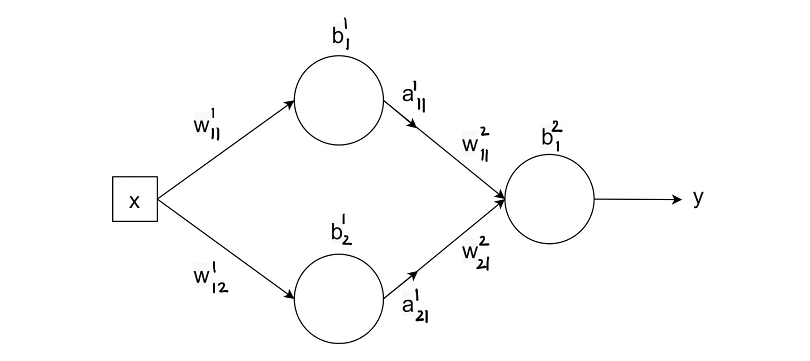

### Define Model

Here, we define two dense layers:


1.   First layer having 2 neurons
2.   Second/Output layer having 1 neuron



In [ ]:
my_layer_1 = keras.layers.Dense(units=2, input_shape=[1])
my_layer_2 = # < YOUR CODE HERE >

***Hint:*** The second layer would have ***units=1*** as the parameter for the `keras.layers.Dense()` API.

We stack both our layers using ***tf.keras.Sequential*** and define our Optimizer and Loss Function.

In [ ]:
model = tf.keras.Sequential([my_layer_1, my_layer_2])
model.compile(optimizer='sgd', loss='mean_squared_error')

### Train Model

In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

### Let's look at our new improved trained model's prediction for the same X values

Once the model is trained, we test it out on new data (test data). We see that the model, for example, outputs Y = ~18.999 for X = 10.0. We see that the prediction of this 2-layer NN is closer to the ground truth of 19.0 than the Single-layer NN.

In [ ]:
print(model.predict([10.0]))

---


**Question 3**: Report the new predicted Y values for the same three X values in Question 2.

**Answer:**
1.   X = , predicted_Y =
2.   X = , predicted_Y =
3.   X = , predicted_Y =


---

### Let's look at our model's learned weights.

Here, the first output represents the two weights and the two biases for the first layer. The second output represents the two weights and one bias for the output layer.

In [ ]:
print(my_layer_1.get_weights())
print(my_layer_2.get_weights())


 ---


**Question 4**:  Why are the Y values predicted by the 2-layer NN closer to the ground truth values?

**Answer:**

---

### Manual Computation for Multi-layer Neural Network

Here, we can manually compute the output for our 2-layer network to better understand how it works.



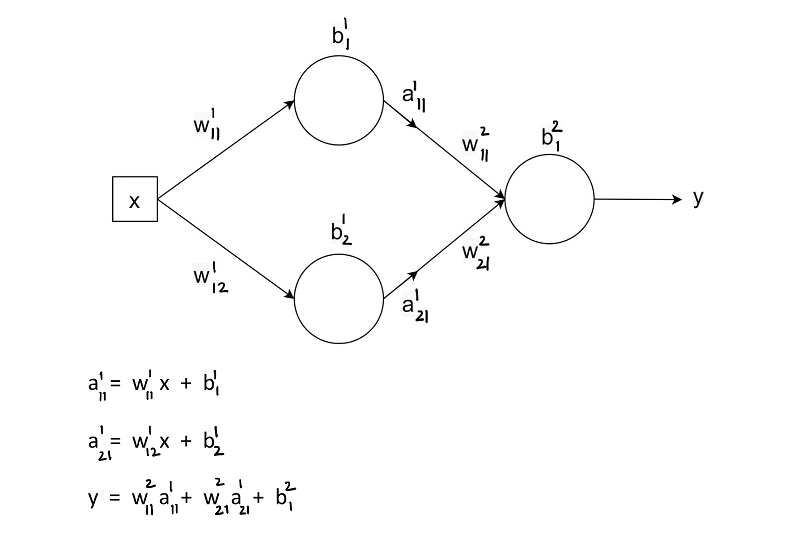

***Recap:*** The notation used in the diagram is as follows:


*   **x** - input, **w** - weight, **b** - bias, **a** - activation (neuron output), **y** - final output
*   superscript - (layer number)
*   subscript - (source unit number, destination unit number)

In [ ]:
value_to_predict = 10.0

# extracting weight and bias values of layer 1
layer1_w1 = (my_layer_1.get_weights()[0][0][0])   # w1_11
layer1_w2 = (my_layer_1.get_weights()[0][0][1])   # w1_12
layer1_b1 = (my_layer_1.get_weights()[1][0])      # b1_1
layer1_b2 = (my_layer_1.get_weights()[1][1])      # b1_2


# extracting weight and bias values of layer 2
layer2_w1 = (my_layer_2.get_weights()[0][0][0])      # w2_11
layer2_w2 = (my_layer_2.get_weights()[0][1][0])      # w2_21
layer2_b = (my_layer_2.get_weights()[1][0])          # b2_1


# activations
neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1      # a1_11
neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2      # a1_21


# final output
neuron3_output =  # < YOUR CODE HERE >   # y = (w2_11 * a1_11) + (w2_21 * a1_21) + b2_1


print("Layer 1 Weights: ", layer1_w1, ", ", layer1_w2)
print("Layer 1 Biases: ", layer1_b1, ", ", layer1_b2)
print()
print("Layer 2 Weights: ", layer2_w1, ", ", layer2_w2)
print("Layer 2 Bias: ", layer2_b)
print()
print("Neuron 1 Output: ", neuron1_output)
print("Neuron 2 Output: ", neuron2_output)
print()
print("Final Output: ", neuron3_output)



---



# Additional Exercise

Here, we define a 2-layer NN that learns the mapping: Y = 2X1 - X2 + 2. The first layer has two neurons and accepts two weighted inputs. The second/output layer has one neuron and gives out one output.

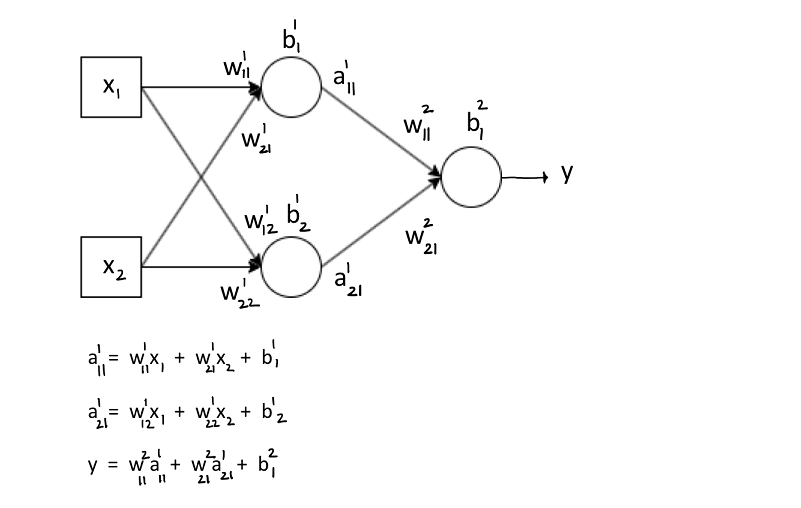

In [ ]:
# define model
my_layer_1 = keras.layers.Dense(units=2, input_shape=(2,)) # input - (x1, x2)
my_layer_2 = keras.layers.Dense(units=1)
model = tf.keras.Sequential([my_layer_1, my_layer_2])

# define optimizer and loss function
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

# creating ground truth data
xs = []
ys = []
for x1 in range(100):
    for x2 in range(100):
        xs.append([x1, x2])
        ys.append([2*x1 - x2 + 2])

xs = np.array(xs)
ys = np.array(ys)

# train model
model.fit(xs, ys, epochs=20)

### Inspect shape of Ground Truth

We see that the input (X1 and X2) has shape (10000, 2) indicating there are 10000 X1 and X2 pairs.

In [ ]:
print(xs.shape)
print(ys.shape)

### Let's look at our trained model's prediction for sample X values

Once the model is trained, we test it out on new data (test data). We see that the model, for example, outputs Y = ~252 for X1 = 120.0 and X2 = -10.0.

In [ ]:
print(model.predict([[120.0, -10.0]]))

### Let's look at our model's learned weights.

Here, the first output represents the four weights and the two biases for the first layer. The second output represents the two weights and one bias for the output layer.

In [ ]:
print(my_layer_1.get_weights())
print(my_layer_2.get_weights())